In [114]:
# Importing Boston Housing CSV

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [117]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [119]:
# Using x,y variables to store data and target dataframe

x,y=data,target


In [120]:
# Importing Linear Regression Library

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [121]:
#Initializing a linear regression model

mod=LinearRegression()

In [122]:
mod.fit(x,y)

LinearRegression()

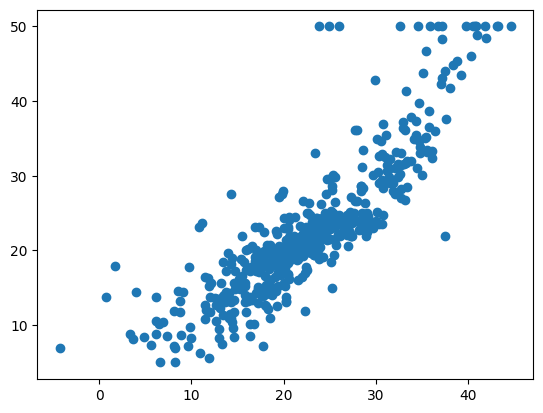

In [123]:
# Making predictions

pred=mod.predict(x)
plt.scatter(pred,y)

In [124]:
# Importing the K-Neighbour Library

from sklearn.neighbors import KNeighborsRegressor

In [125]:
# Initializing a K-Neighbour Model

mod1= KNeighborsRegressor()

In [126]:
# Training the model

mod1.fit(x,y)

KNeighborsRegressor()

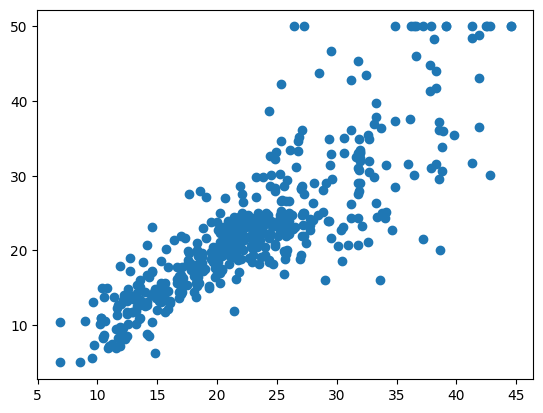

In [127]:
# Making the predictions

pred1=mod1.predict(x)
plt.scatter(pred1,y)

In [128]:
# PreProcessing

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [135]:
# Developing a pipeline to keep track

pipe=Pipeline([
    ("Pipe", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))])

In [136]:
pipe.fit(x,y)

Pipeline(steps=[('Pipe', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

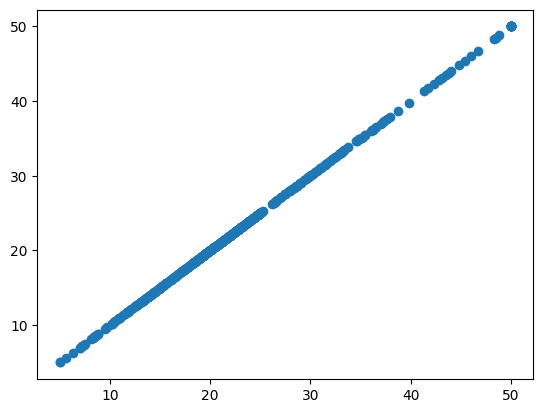

In [137]:
pred=pipe.predict(x)
plt.scatter(pred,y)

In [138]:
# GridSearchCV Model
from sklearn.model_selection import GridSearchCV


In [139]:
# Function to get to know the parameters used by the KNeighbourRegressor

pipe.get_params()

{'memory': None,
 'steps': [('Pipe', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'Pipe': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'Pipe__copy': True,
 'Pipe__with_mean': True,
 'Pipe__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [153]:
# Making a GridSearch CV

mod=GridSearchCV(
    estimator=pipe,
    param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, 
    cv=3
)

In [154]:
mod.fit(x,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Pipe', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

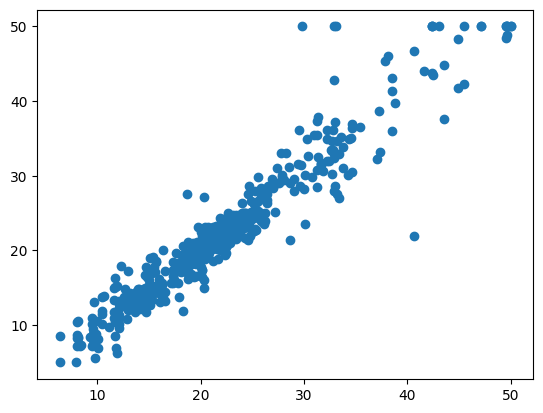

In [155]:
pred=mod.predict(x)
plt.scatter(pred,y)

In [156]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003331,0.000981,0.001358,0.001260,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001549,0.001125,0.002923,0.002573,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001929,0.001544,0.003470,0.003360,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.004947,0.003531,0.003106,0.003382,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.009868,0.008600,0.000950,0.001344,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000000,0.000000,0.005456,0.003859,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000000,0.000000,0.002803,0.003965,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000000,0.000000,0.002493,0.003526,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.004417,0.003241,0.001077,0.001195,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002519,0.003563,0.000191,0.000270,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
